<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Георгий, доброго дня! рад приветствовать тебя вновь) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Привет, я прислал черновой вариант своего проекта, потому что к сожалению он дался мне прям со скрипом почему-то... В чате ребята пишут что у них результаты совсем другие, а я ошибку свою не вижу. Пожалуйста посмотри в чем я прав в чем нет, заранее спасибо за проверку
</div>


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, договорились)

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def line():
    print('-------------------------------------------------')

In [2]:
data_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

data_geo_0 = data_geo_0.drop(['id'], axis = 1)

data_geo_1 = data_geo_1.drop(['id'], axis = 1)

data_geo_2 = data_geo_2.drop(['id'], axis = 1)

line()
print(data_geo_0.info())
line()
print(data_geo_1.info())
line()
print(data_geo_2.info())
line()

-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB
None
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB
None
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Данные на базе) Тут хорошо бы результировать увиденное: пропуски, анаомалии... т.е. итоги аналитического раздела. Также, хорошо бы посмотреть кореляции и провести графический анализ (собственно это для каждого проекта одинаково)

## Обучение и проверка модели

In [3]:
# Разделим признаки и цели по каждому региону

features_geo_0 = data_geo_0.drop(['product'], axis = 1)
target_geo_0 = data_geo_0['product']

features_geo_1 = data_geo_1.drop(['product'], axis = 1)
target_geo_1 = data_geo_1['product']

features_geo_2 = data_geo_2.drop(['product'], axis = 1)
target_geo_2 = data_geo_2['product']

features_train_geo_0, features_valid_geo_0, target_train_geo_0, target_valid_geo_0 = train_test_split(
    features_geo_0, target_geo_0, test_size = 0.25, random_state = 12345)

features_train_geo_1, features_valid_geo_1, target_train_geo_1, target_valid_geo_1 = train_test_split(
    features_geo_1, target_geo_1, test_size = 0.25, random_state = 12345)

features_train_geo_2, features_valid_geo_2, target_train_geo_2, target_valid_geo_2 = train_test_split(
    features_geo_2, target_geo_2, test_size = 0.25, random_state = 12345)

# Проверим размерность наборов: тренировочного и тестового

print(target_train_geo_0.shape, target_valid_geo_0.shape)
print(target_train_geo_1.shape, target_valid_geo_1.shape)
print(target_train_geo_2.shape, target_valid_geo_2.shape)

(75000,) (25000,)
(75000,) (25000,)
(75000,) (25000,)


In [4]:
# Обучим модели, для удобства создадим массив с тренировочными и валидными наборами

mass_train_features = [features_train_geo_0, features_train_geo_1, features_train_geo_2]
mass_train_targets = [target_train_geo_0, target_train_geo_1, target_train_geo_2]

mass_valid_features = [features_valid_geo_0, features_valid_geo_1, features_valid_geo_2]
mass_valid_targets = [target_valid_geo_0, target_valid_geo_1, target_valid_geo_2]

mass_predictions = []

for num_geo in range(len(mass_train_features)):
    model = LinearRegression()
    model.fit(mass_train_features[num_geo], mass_train_targets[num_geo])
    predictions = model.predict(mass_valid_features[num_geo])
    mass_predictions.append(pd.Series(predictions))
    print('RMSE для региона №' + str(num_geo + 1), mean_squared_error(mass_valid_targets[num_geo], predictions) ** 0.5)
    print('Cредний запас предсказанного сырья для региона', predictions.mean(), '\n')

RMSE для региона №1 37.5794217150813
Cредний запас предсказанного сырья для региона 92.59256778438038 

RMSE для региона №2 0.893099286775616
Cредний запас предсказанного сырья для региона 68.728546895446 

RMSE для региона №3 40.02970873393434
Cредний запас предсказанного сырья для региона 94.96504596800489 



Комментарий: По полученным данным мы определили, что в среднем в первом и втором регионе наша модель предсказывает значения хуже чем во втором. НО самый большой запас сырья по предсказаниям находится в третьем регионе

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>отлично,согласен с результатами. Маленькая ошибка в регионе 2 - следствие высокой корреляции f2 и целевой. <br>
И код тебе удалось написать достаточно ёмкий)

## Подготовка к расчёту прибыли

In [5]:
# Ключевые значения

budget = 10 ** 10
revenue_barrel = 450000
count_borehole = 200

# Достаточное количество добычи нефти, для безубыточности

sufficient_volume = budget / revenue_barrel / count_borehole

print('Для безубыточной разработки необходимо чтобы одна скважина добывала не менее:', round(sufficient_volume + 1), 'тыс. баррелей \n')

# Рассчитаем средний запас по каждому региону

print('В среднем первый регион добывает:', round(data_geo_0['product'].mean()), 'тыс. баррелей')
print('В среднем второй регион добывает:', round(data_geo_1['product'].mean()), 'тыс. баррелей')
print('В среднем третий регион добывает:', round(data_geo_2['product'].mean()), 'тыс. баррелей')
print(budget)

Для безубыточной разработки необходимо чтобы одна скважина добывала не менее: 112 тыс. баррелей 

В среднем первый регион добывает: 93 тыс. баррелей
В среднем второй регион добывает: 69 тыс. баррелей
В среднем третий регион добывает: 95 тыс. баррелей
10000000000


Комментарий: Данный шаг нам показывает, что во первых третий регион превосходит своих конкурентов по средней добыче, а значит предсказания модели верны, также мы выяснили что одна скважина дожна добывать не менее 112 тыс. баррелей для того чтобы окупить вложенные деньги

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='red'><br>
есть точка безубыточности) Но там с размерностью бюджета чуть надо скорретировать (112 тыс ожидается).  итогда вывоод по регионам будет не утешительный..

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Невнимательность... При таком раскладе у нас не очень утешительный прогноз, действительно одна скважина должна добывать не менее 112 тыс. баррелей, а средние значения по каждому из регионов меньше. Т.е мы должны выбирать только самые лучшие месторождения и не имеем право на сильное отклонение
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ОК

## Расчёт прибыли и рисков 

In [8]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count].sum()
    price = selected * revenue_barrel
    return (price - budget) / 10 ** 9

for i in range(3):
   # print('Прибыль региона №' +  str(i + 1), revenue(mass_valid_targets[i], mass_predictions[i], 200))
    print('Прибыль региона №' +  str(i + 1), revenue(mass_valid_targets[i].reset_index(drop=True), mass_predictions[i], 200))

# ТУТ ИНДЕКСАЦИЮ НАДО СБРОСИТЬ У ТАРГЕТА)

Прибыль региона №1 3.3208260431398524
Прибыль региона №2 2.4150866966815108
Прибыль региона №3 2.7103499635998327


Комментарий: Самый прибыльный регион, это третий регион

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Тут я понял свою ошибку. Тогда мы наблюдаем совсем другую картину, самый прибыльный регион теперь регион под №1
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>ОК, принято)

## Bootstrap

95%-й доверительный интервал: (-0.10209009483793655 : 0.9479763533583688)
Средняя прибыль: 0.42593852691059236
Риск убытка: 6.0


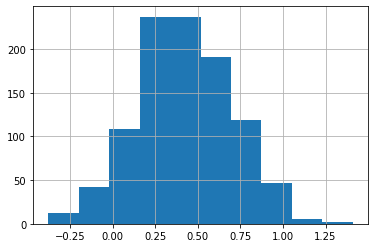

95%-й доверительный интервал: (0.1281232314330863 : 0.9536129820669086)
Средняя прибыль: 0.5182594936973248
Риск убытка: 0.3


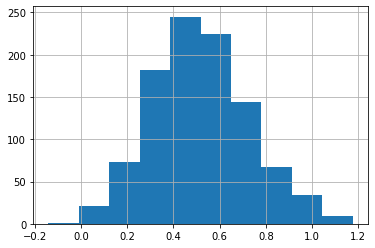

95%-й доверительный интервал: (-0.11585260916001143 : 0.989629939844574)
Средняя прибыль: 0.4201940053440501
Риск убытка: 6.2


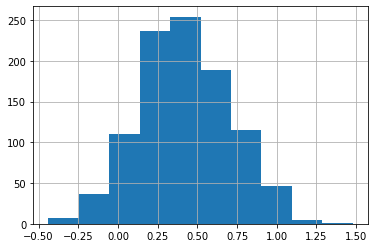

In [7]:
values = [[],[],[]]
state = np.random.RandomState(12345)

for i in range(3):
    for j in range(1000):
       # target_sample = mass_valid_targets[i].sample(n = 500, replace = True, random_state=state)
        target_sample = mass_valid_targets[i].reset_index(drop=True).sample(n = 500, replace = True, random_state=state)
        probs_subsample = mass_predictions[i][target_sample.index]
        #values[i].append(revenue(probs_subsample, target_sample, 200)) # !!!!! во здесь очерёдность подачи в функцию надо изменить...
        
        # Заменил
        values[i].append(revenue(target_sample, probs_subsample, 200))
        
    values[i] = pd.Series(values[i])
    values[i].hist()
    print('95%-й доверительный интервал: (' + str(values[i].quantile(0.025)) + ' : ' + str(values[i].quantile(0.975)) + ')')
    print('Средняя прибыль:', values[i].mean())
    print('Риск убытка:', stats.percentileofscore(values[i], 0))
    plt.show()

Комментарий: С помощью Bootstrap мы определили, доверительный интервал для регионов, и лучшими показателями вновь обладает третий регион, и шанс убытков равен 0

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> По полученным данным, можно дать следующие советы, если бизнесу важна маскимальная прибыль, то есть смысл попытать удачу и выбрать 3 регион, в котором мы можем получить прибыль до 10979 млрд., если нам необходимо просто заработать более чем 10000 млрд., то лучше выбрать 2 регион, а регион №1 уступает по всем параметрам

</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>Георгий, привет. С доработками - ОК. Теперь расчёт тот, что нужен. Только вывод, наверное, старый у тебя остался - вроде второй регион у нас наиболее выгодный - и по прибыли и по рискам: 518 млн. по деньгам и риски при этом менее 1%.<br>
А так - всё ОК.<br>    
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Георгий, на самом деле очень последовательная работа!<br>
И аргументация, и удобный для просмотра код - многое удалось как надо<br>
Итоги в конце - понятные и чёткие. Хорошо, что довериетльные интервала взял те, которые нужны, ОК.<br>
      
Данный проект не простой, может показаться. Потому что, его цель не просто построить прогноз по модели или прогноз продаж. А научиться выбирать лучшее управленческое решение на основе метода моделирования ситуации. В этом ключе и есть смысл её рассматривать. (Кстати, одна из программ на рынке по этой теме - AnyLogic - интересный продукт. Мне приходилось как-то смотерть её.. интересно. Можешь ролик из инета глянуть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования может по-другому лечь... Ведь бутсреп (в лоджике егое нет) - как раз один из спобов моделирования)<br>    

<font color='red'>    
Есть несколько моментом, которые надо бы проверить:<br>
1) проверить размерность бюджета<br>
2) индексация таргета: в твоём коде - вставил комментарии, посмотри, пожалуйта.<br>
3) В функции бутстрепа - там подача целевой и предикта не в том порядке, что функция прибыли будет ждать... Лучше изменить...<br>

<font color='green'>    
Спасибо)<br>
Буду ждать комментариев)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован